# Sentiment Analysis of Twitter user's reaction

/home/gokulnath1_d/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model saved to /home/gokulnath1_d/Documents/gokul/Project/senti_analysis/sentiment_model.pkl
Vectorizer saved to /home/gokulnath1_d/Documents/gokul/Project/senti_analysis/vectorizer.pkl
Accuracy: 0.77683125
Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.75      0.77    159494
    positive       0.76      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



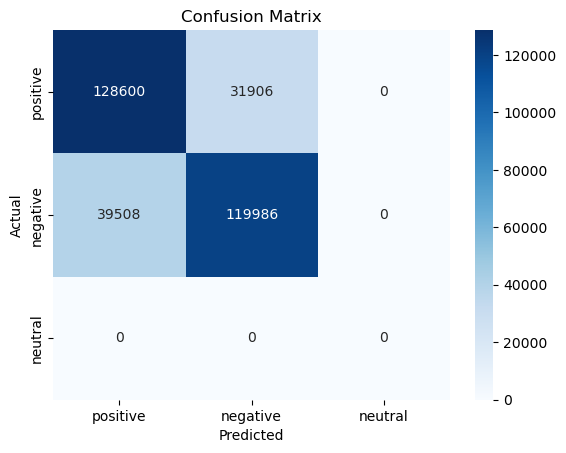

In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Dataset
def load_dataset(file_path):
    """Load dataset from a CSV file."""
    df = pd.read_csv(file_path, encoding='latin-1')  # Adjust encoding if necessary
    df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']  # Rename columns
    df = df[['sentiment', 'text']]  # Keep only relevant columns
    df['sentiment'] = df['sentiment'].replace({0: 'negative', 2: 'neutral', 4: 'positive'})  # Map labels
    return df

# Step 2: Data Preprocessing
def preprocess_text(text):
    """Clean and preprocess tweet text."""
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'\W', ' ', text)     # Remove special characters
    text = text.lower().strip()         # Convert to lowercase and strip whitespace
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def save_model_and_vectorizer(model, vectorizer, model_path="/home/gokulnath1_d/Documents/gokul/Project/senti_analysis/sentiment_model.pkl", vectorizer_path="/home/gokulnath1_d/Documents/gokul/Project/senti_analysis/vectorizer.pkl"):
    """Save the trained model and vectorizer to local files."""
    joblib.dump(model, model_path)
    joblib.dump(vectorizer, vectorizer_path)
    print(f"Model saved to {model_path}")
    print(f"Vectorizer saved to {vectorizer_path}")

# Step 3: Sentiment Classification
def classify_sentiment(df):
    """Train and test a sentiment analysis model."""
    X = df['text']
    y = df['sentiment']
    
    # Convert text to numerical data
    vectorizer = CountVectorizer()
    X_vectorized = vectorizer.fit_transform(X)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
    
    # Train a Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    #saving the model
    save_model_and_vectorizer(model, vectorizer)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return y_test, y_pred

# Step 4: Visualization
def visualize_results(y_test, y_pred):
    """Visualize results with a confusion matrix."""
    cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative', 'neutral'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Main Function
if __name__ == "__main__":
    # Load Dataset
    dataset_path = "/home/gokulnath1_d/Downloads/twitter.csv"  # Update with your dataset file path
    tweet_df = load_dataset(dataset_path)
    
    # Preprocess Tweets
    tweet_df['text'] = tweet_df['text'].apply(preprocess_text)
    
    # Sentiment Classification
    y_test, y_pred = classify_sentiment(tweet_df)
    
    # Visualization
    visualize_results(y_test, y_pred)


## Saving and Testing the model

In [16]:
def load_model_and_vectorizer(model_path, vectorizer_path):
    """Load the trained model and vectorizer from local files."""
    model = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)
    print("Model and vectorizer loaded successfully.")
    return model, vectorizer

def predict_sentiment(external_texts, vectorizer, model):
    """Predict the sentiment of external text data."""
    preprocessed_texts = [preprocess_external_text(text) for text in external_texts]
    text_vectors = vectorizer.transform(preprocessed_texts)  # Transform using the saved vectorizer
    predictions = model.predict(text_vectors)  # Predict using the loaded model
    return predictions

def preprocess_external_text(text):
    """Clean and preprocess a single external tweet."""
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'\W', ' ', text)     # Remove special characters
    text = text.lower().strip()         # Convert to lowercase and strip whitespace
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [17]:
if __name__ == "__main__":
    # Load saved model and vectorizer
    model_path = "/home/gokulnath1_d/Documents/gokul/Project/senti_analysis/sentiment_model.pkl"
    vectorizer_path = "/home/gokulnath1_d/Documents/gokul/Project/senti_analysis/vectorizer.pkl"
    model, vectorizer = load_model_and_vectorizer(model_path, vectorizer_path)
    
    # Test with new external data
    external_texts = [
        "I absolutely love this product! Best purchase ever.",
        "The service was horrible, never going back!",
        "I'm not sure how I feel about this, it's okay I guess."
    ]
    
    predictions = predict_sentiment(external_texts, vectorizer, model)
    
    for text, sentiment in zip(external_texts, predictions):
        print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

Model and vectorizer loaded successfully.
Text: I absolutely love this product! Best purchase ever.
Predicted Sentiment: positive

Text: The service was horrible, never going back!
Predicted Sentiment: negative

Text: I'm not sure how I feel about this, it's okay I guess.
Predicted Sentiment: negative

